# Project 1 GSS Paper
### DS 3001: Foundations of Machine Learning
### Gabe Silverstein, Rohan Chowla, Evan Stewart, and Rithwik Raman

## Summary

**A one paragraph description of the question, methods, and results (about 350 words)**

In this paper, relationships between various variables are encovered from the General Social Survey, a panel of data about American's socail and economic views conducted from 1972 until present. Variables of interest include prestige of respondent's occupation, hours worked at all jobs, age, income from occupation, education, and industry were analyzed to find. The research quesiton asked was xxx. In order to answer this, xxx was used.

## Data

One to two pages discussing the data and key variables in the analysis, and any challenges in reading, cleaning, and preparing them for analysis

In this analysis, variables were selected from the General Social Survey, a panel data survey about Americans' social and economic views conducted since 1972. The varibales of interest in this project include PRESTG10 - prestige of the respondents occupation, HRS1 - hours worked at all jobs, AGE - the age of the respondent, RINCOME16 - income from the respondent's occupation, EDUC - education level of the respondent, and INUDS10 - the industry the respondent works in. The purpose of this analysis is to reveal relationships between these variables. (?) The data were originally acquired as three decomposed parquet files, which were read and combined into a comma seperated value (.csv) file containing only the variables of interest. Null and missing values were compensated for by instating the mean of the variables in their place. This was done to ommit outliers in the dataset. Data on age were group into spans of 10 years. Industry code data was labeled using appropriate codes from the U.S. Bureau of the Census Occupation and Industry Codes. Income was also classified into groups based on xxx. In order to determine variables of interest, a covariance matrix was calcualted for our variables of interest. This analsysis revealed a strong correlation between education and prestige, with a covariance of 0.476881. A correlation of 0.273366 was also revealed between prestige and income. Further analysis was needed to determine relationships betwene income, education level, and prestige in individual industries.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
! git clone https://github.com/gsilver321/project_gss

Cloning into 'project_gss'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 41 (delta 15), reused 8 (delta 5), pack-reused 17
Receiving objects: 100% (41/41), 24.86 MiB | 24.76 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [ ]:
df = pd.read_csv('project_gss/gss_clean.csv') # data cleaning can be found at gss_cleaning.ipynb in GitHub

In [ ]:
df.drop([c for c in df.columns if 'lbl' in c], axis=1).corr() # determine which variables to perform anaylsis on

,age,income,education,industry,hours,prestige
age,1.000000,0.047118,-0.011602,-0.057421,-0.051805,0.102491
income,0.047118,1.000000,0.255987,-0.025643,0.220088,0.273366
education,-0.011602,0.255987,1.000000,0.199906,0.037270,0.476881
industry,-0.057421,-0.025643,0.199906,1.000000,-0.085111,0.189914
hours,-0.051805,0.220088,0.037270,-0.085111,1.000000,0.092865
prestige,0.102491,0.273366,0.476881,0.189914,0.092865,1.000000


  In order to determine variables of relevance for analysis, a covariance matrix was calculated for our variables of interest. This analysis revealed a strong correlation between education and prestige, with a covariance of 0.476881. A correlation of 0.273366 was also revealed between prestige and income. Further analysis was needed to determine relationships between income, education level, and prestige in individual industries.

In [ ]:
income_order = ['< $10k', '$10-25k', '$25-50k', '$50-75k', '$75-100k', '$100-250k', '$250k+']
educ_order = ['Less than high school', 'High School Diploma', 'Some college', "Bachelor's Degree", 'Postgrad']
indus_order = ['Agriculture, forestry, fishing, and hunting', 'Mining, quarrying, and oil and gas extraction',
'Utilities', 'Construction', 'Manufacturing', 'Wholesale and retail trade','Transportation and warehousing',
'Information', 'Finance and insurance', 'Real estate and rental and leasing','Professional and technical services',
'Management, administrative, and waste services', 'Educational services', 'Health care and social assistance',
'Leisure and hospitality', 'Other services', 'Public administration']

## Results

Two to five pages providing visualizations, statistics, and a discussion of your findings. If you have a lot of plots or tables, that’s OK, but try to focus on a few key pieces of evidence rather than doing every single pairwise comparison of some set of variables

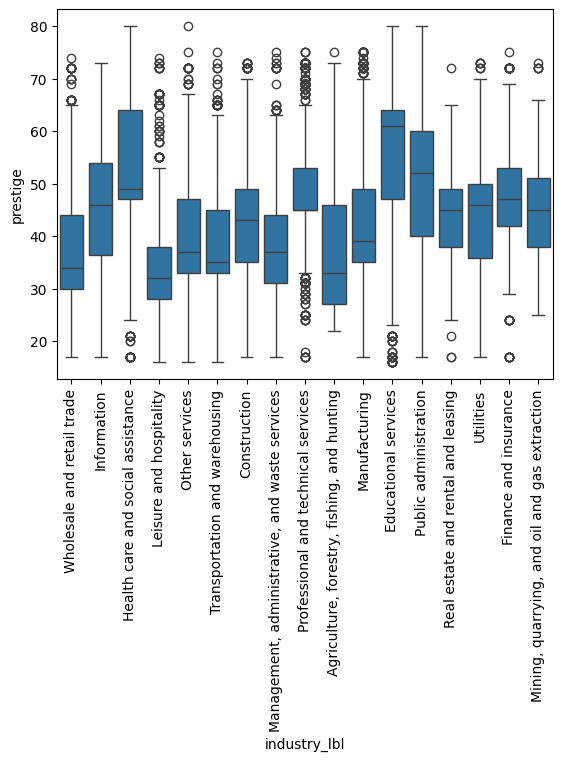

In [ ]:
ax = sns.boxplot(data=df, x='industry_lbl', y='prestige')
ax.tick_params(axis='x', rotation=90)

<Axes: xlabel='income_lbl', ylabel='prestige'>

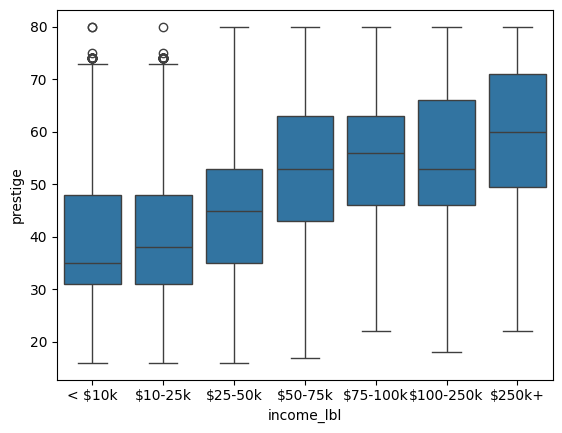

In [ ]:
sns.boxplot(data=df, x='income_lbl', y='prestige')

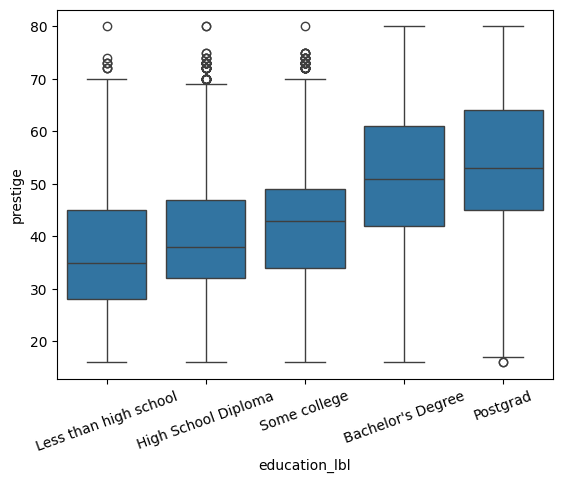

In [ ]:
ax = sns.boxplot(data=df, x='education_lbl', y='prestige')
ax.tick_params(axis='x', rotation=20)

The boxplots depict variable levels of prestige when grouped by industry. Some industries, like educational services and healthcare/social services have higher median prestige values (around the 60) outliers. Other industries, such as Professional services, have numerous outliers on both extremities with a median prestige value of exactly 50. When grouped by education, Bachelor’s and Postgrad degrees have similarly high prestige values with minimal outliers, and grouping by income depicts a steady positive linear correlation with median prestige.

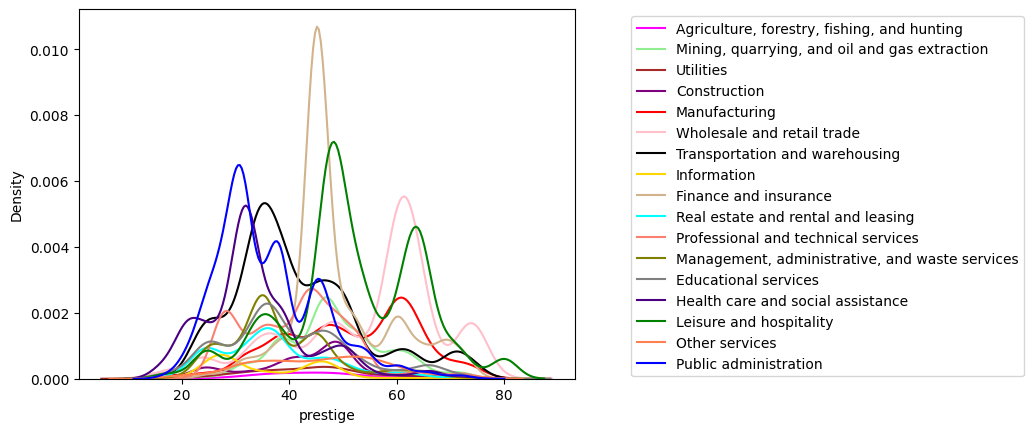

In [ ]:
colors = ['blue', 'coral', 'green', 'indigo', 'grey', 'olive', 'salmon', 'cyan', 'tan',
          'gold', 'black', 'pink', 'red', 'purple', 'brown', 'lightgreen', 'magenta']
ax = sns.kdeplot(data=df, x='prestige', hue='industry_lbl', palette=colors)
ax.legend(bbox_to_anchor=(1.1, 1), labels=indus_order)

<Axes: xlabel='prestige', ylabel='Density'>

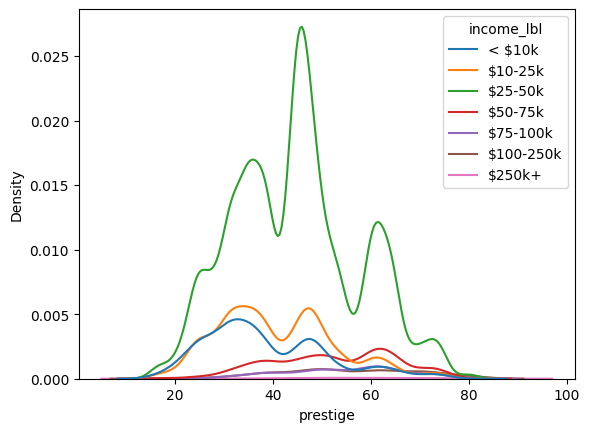

In [ ]:
sns.kdeplot(data=df, x='prestige', hue='income_lbl')

<Axes: xlabel='prestige', ylabel='Density'>

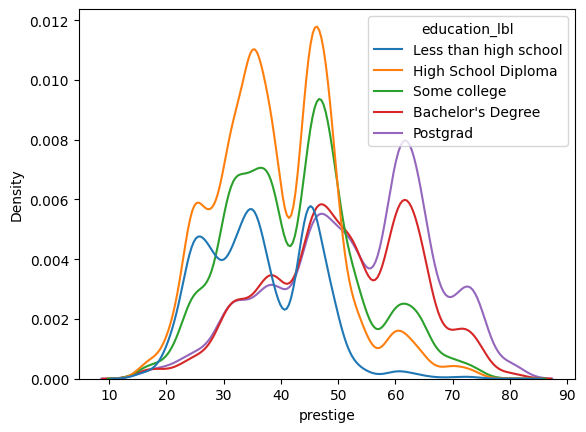

In [ ]:
sns.kdeplot(data=df, x='prestige', hue='education_lbl')

The line graphs measure density of prestige values across industries, income, and education. Many industries, such as hospitality and public administration, have bimodal, or even trimodal distributions of the data, with numerous peaks in densities across various prestige levels. The prestige density of jobs in finance and insurance industries, however, has a strong singular peak around the 50-level prestige value. Other industries, like wholesale/retail trade and manufacturing, have largely uniform density distributions across all prestige values. Prestige densities when grouped by income shows a large peak in density from the 40-60 prestige range for incomes of 25-50k. Lower incomes depict largely uniform distribution with slight peaks around the 20-40 prestige range, and higher incomes similarly have uniform distribution with slight peaks at higher prestige ranges. Bachelor’s and Postgrad densities have strong peaks around the 60-70 range, with all other educational levels having strong peaks at the 35 and 50 prestige values.

In [ ]:
tbl = pd.pivot_table(df, index='industry_lbl', columns='income_lbl', values='prestige') # gets avg prestige for each industry, income pair
tbl = tbl.loc[:, income_order]
tbl

income_lbl,< $10k,$10-25k,$25-50k,$50-75k,$75-100k,$100-250k,$250k+
industry_lbl,,,,,,,
"Agriculture, forestry, fishing, and hunting",33.636364,34.560000,35.683908,50.181818,45.000000,42.833333,NaN
Construction,37.511628,39.261538,41.489771,46.348214,48.961538,49.108108,58.500000
Educational services,48.260417,51.691176,55.083221,61.278607,63.016667,64.034483,66.500000
Finance and insurance,44.203704,42.396947,47.296355,52.037383,54.781818,55.382022,56.111111
Health care and social assistance,46.911839,47.728333,51.568158,60.209302,62.608108,68.898990,73.000000
Information,41.744186,41.736842,45.009146,49.574074,50.500000,56.117647,53.500000
Leisure and hospitality,31.464358,34.676845,34.029508,45.454545,40.777778,54.312500,51.000000
"Management, administrative, and waste services",34.000000,36.006098,37.855000,45.921053,45.727273,44.769231,NaN
Manufacturing,37.687500,36.975275,40.974076,49.105769,53.025000,53.870130,59.625000


<Axes: xlabel='income_lbl', ylabel='industry_lbl'>

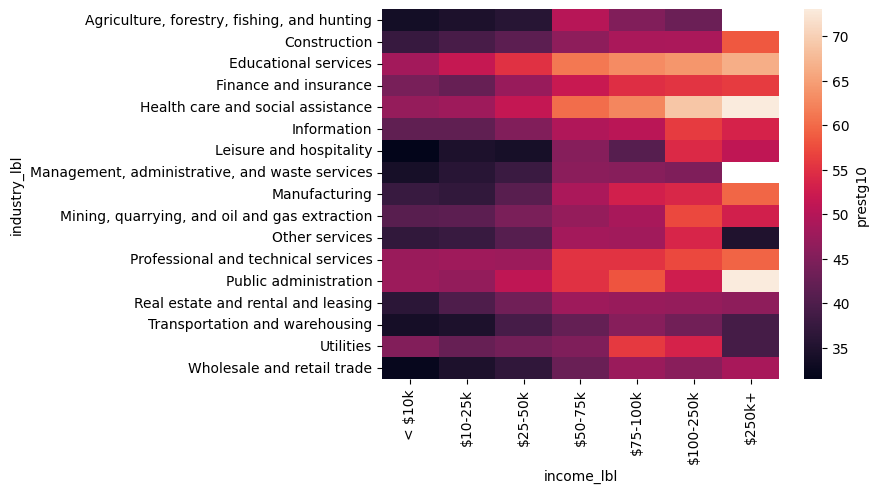

In [ ]:
sns.heatmap(tbl, cbar_kws={'label': 'prestg10'})

In [ ]:
tbl = pd.pivot_table(df, index='industry_lbl', columns='education_lbl', values='prestige') # gets avg prestige for each industry, education pair
tbl = tbl.loc[:, educ_order]
tbl

education_lbl,Less than high school,High School Diploma,Some college,Bachelor's Degree,Postgrad
industry_lbl,,,,,
"Agriculture, forestry, fishing, and hunting",33.183333,35.947917,38.238095,42.423077,41.040000
Construction,37.588957,40.007619,41.813725,47.299213,48.056962
Educational services,33.098901,38.604563,45.843866,56.980231,60.637288
Finance and insurance,43.000000,43.676471,45.958647,51.254777,51.476596
Health care and social assistance,43.093284,45.485944,49.407862,56.806504,58.569361
Information,33.125000,39.909910,42.846847,49.013423,49.840278
Leisure and hospitality,30.656174,32.277778,34.444954,39.507389,37.869565
"Management, administrative, and waste services",33.023669,35.500000,38.354651,42.750000,41.891566
Manufacturing,34.800774,38.489201,41.229885,49.993119,49.616246


<Axes: xlabel='education_lbl', ylabel='industry_lbl'>

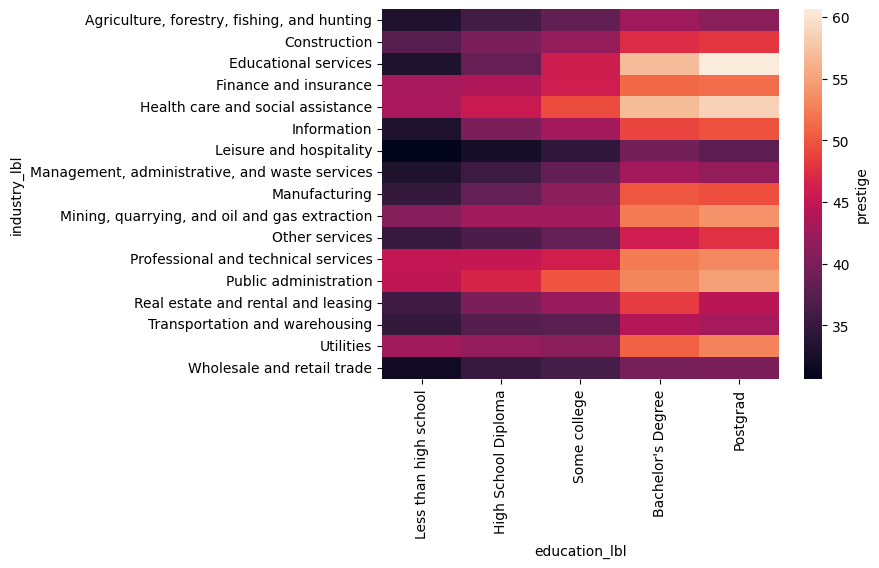

In [ ]:
sns.heatmap(tbl, cbar_kws={'label': 'prestige'})

In [ ]:
df.loc[:, ['education_lbl','income_lbl','prestige']].groupby(['education_lbl','income_lbl'], sort=False).describe()

prestige                                     \
                                    count       mean        std   min    25%   
education_lbl         income_lbl                                               
Less than high school < $10k        501.0  33.147705   8.708050  16.0  27.00   
                      $10-25k       495.0  34.727273   9.477032  16.0  27.00   
                      $25-50k      2104.0  37.113593   9.223073  16.0  30.00   
                      $50-75k        38.0  40.447368   9.246467  28.0  35.00   
                      $75-100k        5.0  41.800000  15.205262  26.0  32.00   
                      $100-250k       7.0  47.000000  16.072751  35.0  36.00   
                      $250k+          1.0  48.000000        NaN  48.0  48.00   
High School Diploma   < $10k        840.0  35.492857   9.992844  16.0  28.00   
                      $10-25k      1223.0  38.183974  10.010044  16.0  31.00   
                      $25-50k      3948.0  40.002533  10.292726  16.0  33.00   
                      $50-75k       273.0  42.589744   9.537475  17.0  35.00   
                      $75-100k       55.0  47.345455  12.565706  25.0  38.00   
                      $100-250k      46.0  45.913043  10.657967  25.0  39.00   
                      $250k+          3.0  43.000000  25.942244  22.0  28.50   
Some college          < $10k        679.0  38.169367  11.148735  16.0  31.00   
                      $10-25k       990.0  40.910101  11.078587  16.0  32.00   
                      $25-50k      3151.0  43.179308  11.218914  16.0  35.00   
                      $50-75k       255.0  47.662745  12.085163  21.0  38.50   
                      $75-100k       67.0  49.970149  11.440187  22.0  40.50   
                      $100-250k      60.0  46.116667  11.459718  22.0  37.50   
                      $250k+          6.0  48.500000   9.792855  38.0  41.50   
Bachelor's Degree     < $10k        358.0  45.237430  14.159438  17.0  33.00   
                      $10-25k       505.0  45.560396  12.964268  16.0  35.00   
                      $25-50k      2501.0  50.685326  12.194906  16.0  44.00   
                      $50-75k       477.0  54.681342  11.180487  17.0  47.00   
                      $75-100k      251.0  53.992032  11.675613  28.0  45.50   
                      $100-250k     230.0  55.673913  13.002610  25.0  46.25   
                      $250k+         22.0  59.090909  11.376287  39.0  50.50   
Postgrad              < $10k        459.0  45.459695  15.016730  16.0  33.00   
                      $10-25k       586.0  46.979522  13.900363  16.0  35.00   
                      $25-50k      2764.0  53.279305  12.821139  17.0  45.00   
                      $50-75k       595.0  57.823529  11.215705  17.0  51.00   
                      $75-100k      274.0  57.843066  11.139846  31.0  50.00   
                      $100-250k     326.0  59.055215  13.124376  18.0  49.00   
                      $250k+         35.0  60.457143  12.476667  39.0  50.00   

                                                     
                                   50%    75%   max  
education_lbl         income_lbl                     
Less than high school < $10k      32.0  38.00  66.0  
                      $10-25k     33.0  42.00  74.0  
                      $25-50k     36.0  45.00  73.0  
                      $50-75k     38.5  44.75  64.0  
                      $75-100k    35.0  56.00  60.0  
                      $100-250k   41.0  50.50  80.0  
                      $250k+      48.0  48.00  48.0  
High School Diploma   < $10k      35.0  43.00  74.0  
                      $10-25k     37.0  47.00  74.0  
                      $25-50k     39.0  47.00  80.0  
                      $50-75k     42.0  49.00  73.0  
                      $75-100k    46.0  56.00  75.0  
                      $100-250k   46.0  52.50  73.0  
                      $250k+      35.0  53.50  72.0  
Some college          < $10k      35.0  48.00  74.0  
                    

In [ ]:
tbl = pd.pivot_table(df, index='education_lbl', columns='income_lbl', values='prestige') # gets avg prestige for each education, income pair
tbl = tbl.reindex(educ_order[::-1])
tbl = tbl.loc[:, income_order]
tbl

income_lbl,< $10k,$10-25k,$25-50k,$50-75k,$75-100k,$100-250k,$250k+
education_lbl,,,,,,,
Postgrad,45.459695,46.979522,53.279305,57.823529,57.843066,59.055215,60.457143
Bachelor's Degree,45.237430,45.560396,50.685326,54.681342,53.992032,55.673913,59.090909
Some college,38.169367,40.910101,43.179308,47.662745,49.970149,46.116667,48.500000
High School Diploma,35.492857,38.183974,40.002533,42.589744,47.345455,45.913043,43.000000
Less than high school,33.147705,34.727273,37.113593,40.447368,41.800000,47.000000,48.000000


<Axes: xlabel='income_lbl', ylabel='education_lbl'>

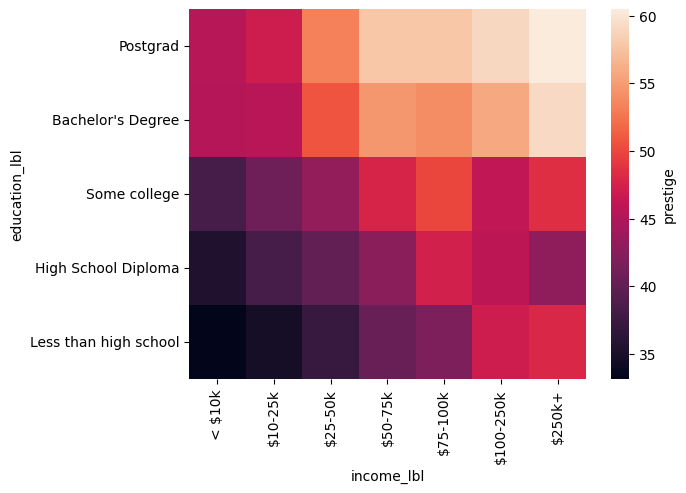

In [ ]:
sns.heatmap(tbl, cbar_kws={'label': 'prestige'})

In [ ]:
df['educationXincome'] = df['education_lbl'] + ', ' + df['income_lbl']
educXincome_order = [s1 + ', ' + s2 for s1 in educ_order for s2 in income_order]
tbl = pd.pivot_table(df, index='industry_lbl', columns='educationXincome', values='prestige') # gets avg prestige for each education X income pair
tbl = tbl.loc[:, educXincome_order]
tbl

educationXincome,"Less than high school, < $10k","Less than high school, $10-25k","Less than high school, $25-50k","Less than high school, $50-75k","Less than high school, $75-100k","Less than high school, $100-250k","Less than high school, $250k+","High School Diploma, < $10k","High School Diploma, $10-25k","High School Diploma, $25-50k",...,"Bachelor's Degree, $75-100k","Bachelor's Degree, $100-250k","Bachelor's Degree, $250k+","Postgrad, < $10k","Postgrad, $10-25k","Postgrad, $25-50k","Postgrad, $50-75k","Postgrad, $75-100k","Postgrad, $100-250k","Postgrad, $250k+"
industry_lbl,,,,,,,,,,,,,,,,,,,,,
"Agriculture, forestry, fishing, and hunting",30.920000,31.900000,33.916667,43.000000,NaN,NaN,NaN,34.125000,34.200000,35.588235,...,NaN,46.000000,NaN,27.000000,39.333333,39.866667,48.000000,61.000000,38.000000,NaN
Construction,35.847826,36.367647,38.400990,35.777778,NaN,53.0,NaN,37.215385,39.279570,39.716667,...,50.000000,52.857143,72.000000,43.722222,40.952381,48.351648,58.062500,52.000000,51.125000,NaN
Educational services,33.000000,30.666667,33.152542,61.000000,NaN,NaN,NaN,36.035088,42.533333,37.986111,...,58.166667,70.250000,61.000000,55.110092,60.150943,60.740791,62.675000,64.297872,63.500000,72.000000
Finance and insurance,NaN,38.600000,44.687500,40.500000,NaN,NaN,NaN,41.666667,40.755556,44.025641,...,53.655172,54.800000,55.333333,43.909091,41.111111,51.070796,52.290323,56.937500,55.977273,54.000000
Health care and social assistance,43.134615,41.276596,43.168675,64.000000,56.0,80.0,NaN,43.955357,45.187845,45.704388,...,61.735294,71.136364,72.000000,53.080645,51.385965,58.111607,61.741935,64.750000,69.000000,73.111111
Information,23.000000,30.000000,36.400000,NaN,NaN,NaN,NaN,36.750000,43.333333,39.488372,...,50.444444,58.750000,NaN,41.714286,42.823529,50.315068,58.437500,52.000000,52.375000,53.500000
Leisure and hospitality,28.284404,32.772727,31.155462,NaN,NaN,NaN,NaN,30.849673,33.453125,32.078571,...,38.333333,51.666667,NaN,32.573529,37.717391,38.555556,53.200000,48.333333,60.125000,51.000000
"Management, administrative, and waste services",31.100000,34.243902,33.036145,38.500000,NaN,37.0,NaN,35.132075,35.954545,35.153846,...,50.800000,43.200000,NaN,30.500000,37.600000,43.800000,49.428571,43.000000,54.000000,NaN
Manufacturing,34.592593,34.200000,34.870130,44.666667,NaN,NaN,NaN,35.444444,35.786667,38.844376,...,50.580645,53.025000,64.333333,45.766667,40.131579,48.329480,55.423077,55.117647,56.560000,56.800000


<Axes: xlabel='educationXincome', ylabel='industry_lbl'>

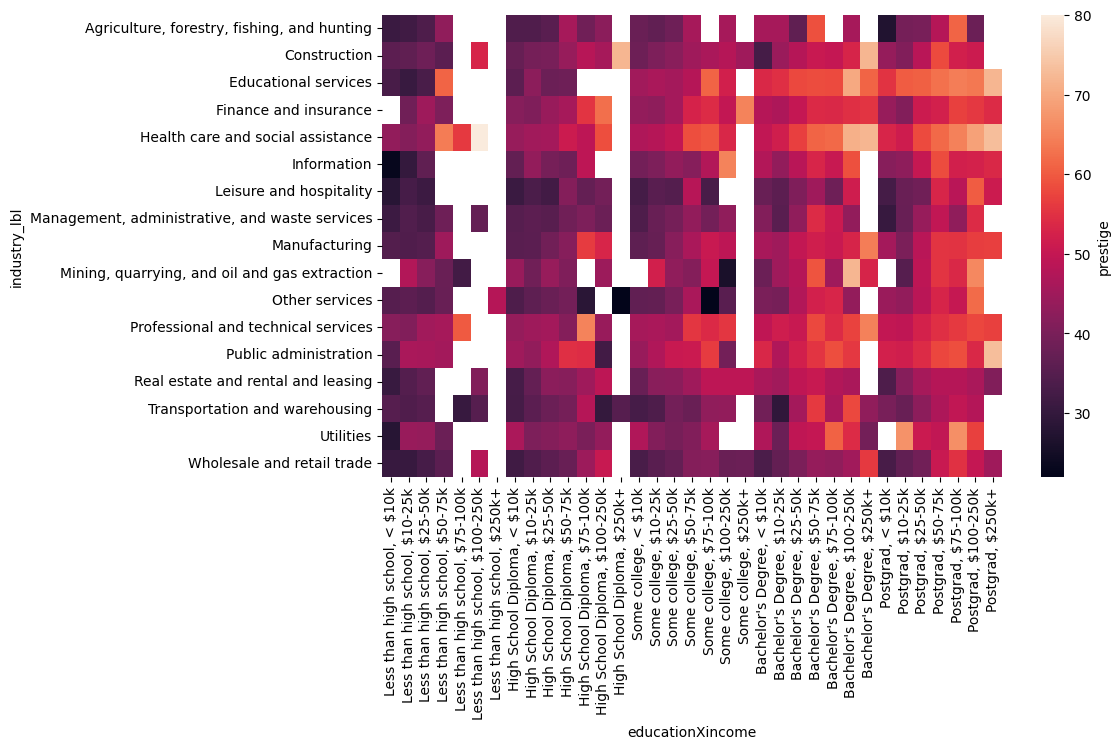

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(tbl, cbar_kws={'label': 'prestige'}, xticklabels=educXincome_order)

Lastly, the heat map depicts a strong correlation between income and education level. The gradient of the color changes neatly with higher salaries and more advanced degrees, with Postgrad/250k jobs having the highest prestige and “Less than high school”/10k jobs having the least amount of prestige.

## Conclusion

One to two pages summarizing the project, defending it from criticism, and suggesting additional work that was outside the scope of the project